###
This code done by Mhd Taha Daboul

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).


In [113]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

###
Reading the data

In [114]:
survived = pd.read_csv("D:\FCAI_25\ML\ML\Titanic_model\gender_submission.csv")
survived

<>:1: SyntaxWarning: invalid escape sequence '\F'
<>:1: SyntaxWarning: invalid escape sequence '\F'
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15336\2708149493.py:1: SyntaxWarning: invalid escape sequence '\F'
  survived = pd.read_csv("D:\FCAI_25\ML\ML\Titanic_model\gender_submission.csv")


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [115]:
test_data = pd.read_csv("test.csv")
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [116]:
train_data = pd.read_csv('train.csv')
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [117]:
test_data["Survived"] = survived['Survived']
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0


In [118]:
print(survived.iloc[1,0])
print(test_data.iloc[1,0])

893
893


In [119]:
# Check if all PassengerId values in 'survived' are in 'train_data'
missing_ids = survived.loc[~survived['PassengerId'].isin(test_data['PassengerId']), 'PassengerId']

if missing_ids.empty:
    print("All PassengerId values are present in train_data.")
else:
    print("The following PassengerId values are not in train_data:")
    print(missing_ids)


All PassengerId values are present in train_data.


In [120]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [121]:
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0


###
Data Visualization

###

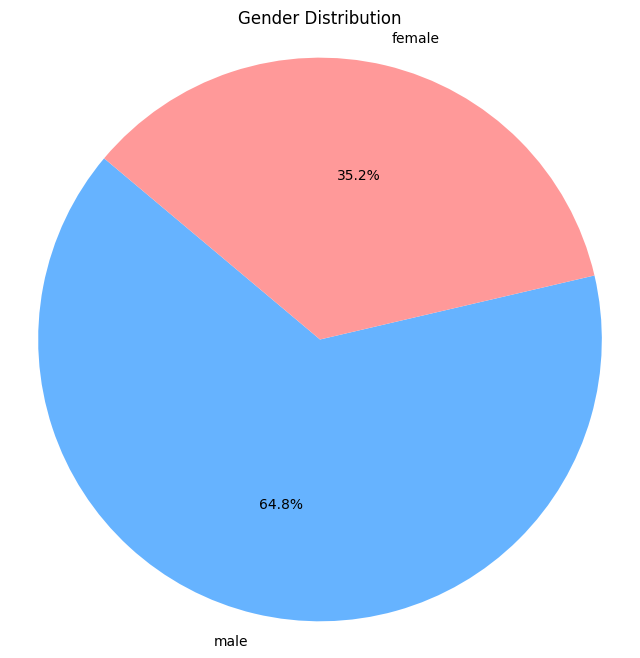

In [122]:
gender_counts = train_data['Sex'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#ff9999'])
plt.title('Gender Distribution')
plt.axis('equal') 
plt.show()

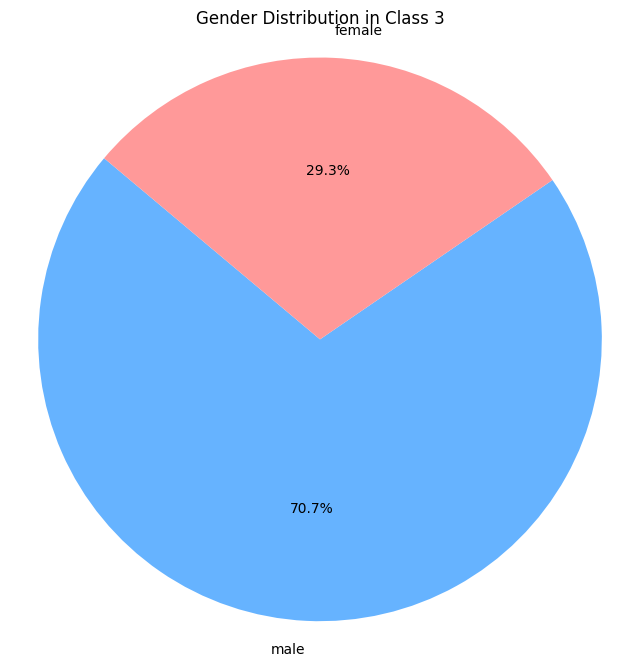

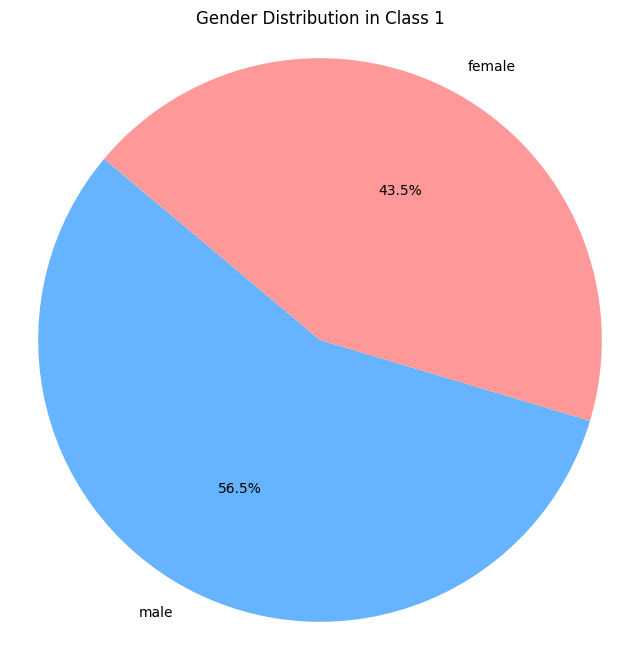

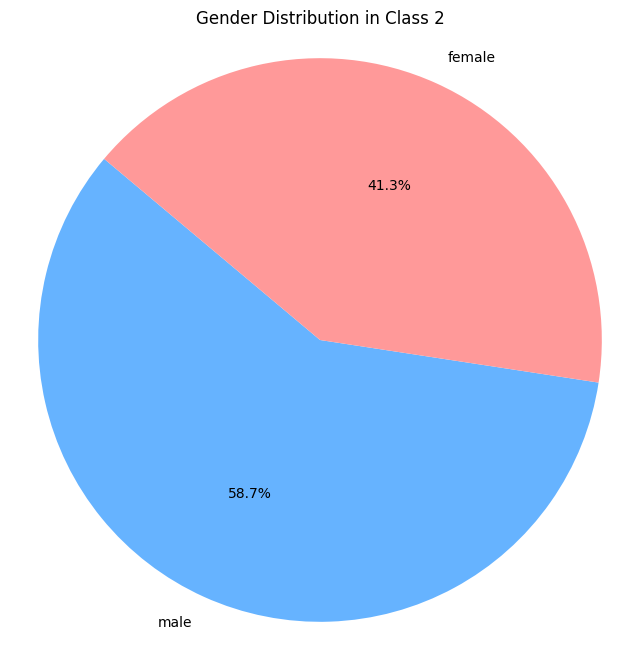

In [123]:
# Define the colors for the pie charts
colors = ['#66b3ff','#ff9999']

# Create a pie chart for each class
for pclass in train_data['Pclass'].unique():
    gender_counts = train_data[train_data['Pclass'] == pclass]['Sex'].value_counts()
    plt.figure(figsize=(8, 8))
    plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
    plt.title(f'Gender Distribution in Class {pclass}')
    plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
    plt.show()

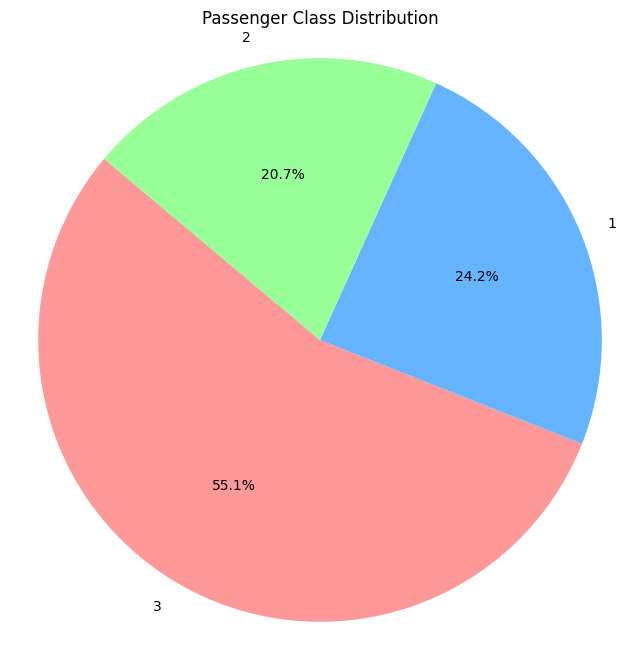

In [124]:
class_counts = train_data['Pclass'].value_counts()

# Define the colors for the pie chart
colors = ['#ff9999', '#66b3ff', '#99ff99']

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Passenger Class Distribution')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()

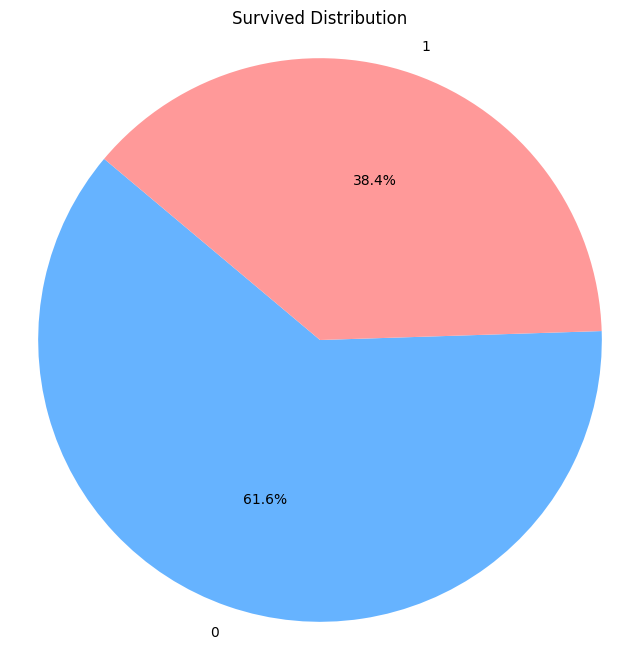

In [125]:

survived_counts = train_data['Survived'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(survived_counts, labels=survived_counts.index, autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#ff9999'])
plt.title('Survived Distribution')
plt.axis('equal') 
plt.show()

### 
Data preprocessing

In [126]:
def process_name_features(df):
    # Extract titles from names
    df['Title'] = df['Name'].str.extract('([A-Za-z]+)\.', expand=False)
    
    # Replace specific titles to standardize them
    title_replacements = {
        'Capt': 'Mr',
        'Col': 'Mr',
        'Major': 'Mr',
        'Jonkheer': 'Mr',
        'Don': 'Mr',
        'Sir': 'Mr',
        'Dr': 'Mr',
        'Rev': 'Mr',
        'Master': 'Mr',
        'Mr': 'Mr',
        'Mme': 'Mrs',
        'Ms': 'Mrs',
        'Mrs': 'Mrs',
        'Miss': 'Miss',
        'Mlle': 'Miss',
        'Lady': 'Miss',
        'Countess': 'Miss',
        'Dona': 'Miss',
        'Engineer': 'Mr'
    }
    df['Title'] = df['Title'].replace(title_replacements)
    
    # Initialize the LabelEncoder for 'Sex'
    le_sex = LabelEncoder()
    
    # Fit and transform the 'Sex' column
    df['Sex'] = le_sex.fit_transform(df['Sex'])
    
    # Initialize the LabelEncoder for 'Title'
    le_title = LabelEncoder()
    
    # Fit and transform the 'Title' column
    df['Title'] = le_title.fit_transform(df['Title'])
    
    return df


<>:3: SyntaxWarning: invalid escape sequence '\.'
<>:3: SyntaxWarning: invalid escape sequence '\.'
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15336\3065731215.py:3: SyntaxWarning: invalid escape sequence '\.'
  df['Title'] = df['Name'].str.extract('([A-Za-z]+)\.', expand=False)


In [127]:
train_data = process_name_features(train_data)
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,C,1


In [128]:
train_data['Title'].value_counts()

Title
1    578
0    186
2    127
Name: count, dtype: int64

In [129]:
test_data = process_name_features(test_data)
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Title
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,Q,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,S,1,2
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,Q,0,1
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,S,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,S,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",1,NaN,0,0,A.5. 3236,8.0500,NaN,S,0,1
414,1306,1,"Oliva y Ocana, Dona. Fermina",0,39.0,0,0,PC 17758,108.9000,C105,C,1,0
415,1307,3,"Saether, Mr. Simon Sivertsen",1,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0,1
416,1308,3,"Ware, Mr. Frederick",1,NaN,0,0,359309,8.0500,NaN,S,0,1


In [130]:
test_data['Title'].value_counts()

Title
1    266
0     79
2     73
Name: count, dtype: int64

In [131]:
print(train_data['Name'].isna().value_counts())
print(test_data['Name'].isna().value_counts())

Name
False    891
Name: count, dtype: int64
Name
False    418
Name: count, dtype: int64


In [132]:
print(train_data['PassengerId'].isna().value_counts())
print(test_data['PassengerId'].isna().value_counts())

PassengerId
False    891
Name: count, dtype: int64
PassengerId
False    418
Name: count, dtype: int64


In [133]:
print(train_data['Pclass'].isna().value_counts())
print(test_data['Pclass'].isna().value_counts())

Pclass
False    891
Name: count, dtype: int64
Pclass
False    418
Name: count, dtype: int64


In [134]:
print(train_data['Age'].isna().value_counts())
print(test_data['Age'].isna().value_counts())

Age
False    714
True     177
Name: count, dtype: int64
Age
False    332
True      86
Name: count, dtype: int64


In [135]:
train_data['Age'].median()

28.0

In [136]:
# Impute missing values with the median age
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
train_data['Age'].isna().value_counts()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15336\1589722740.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Age'].fillna(train_data['Age'].median(), inplace=True)


Age
False    891
Name: count, dtype: int64

In [137]:
# Impute missing values with the median age
test_data['Age'].fillna(test_data['Age'].median(), inplace=True)
test_data['Age'].isna().value_counts()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15336\2376152053.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_data['Age'].fillna(test_data['Age'].median(), inplace=True)


Age
False    418
Name: count, dtype: int64

In [138]:
print(train_data['SibSp'].isna().value_counts())
print(test_data['SibSp'].isna().value_counts())

SibSp
False    891
Name: count, dtype: int64
SibSp
False    418
Name: count, dtype: int64


In [139]:
print(train_data['Parch'].isna().value_counts())
print(test_data['Parch'].isna().value_counts())

Parch
False    891
Name: count, dtype: int64
Parch
False    418
Name: count, dtype: int64


In [140]:
print(type(train_data['Parch'][0]))
print(type(train_data['SibSp'][0]))

<class 'numpy.int64'>
<class 'numpy.int64'>


In [141]:
def process_family_features(df):
    # Calculate number of family members
    df['Num_of_Family_Mem'] = df['SibSp'] + df['Parch'] + 1
    
    # Determine if the passenger is alone
    df['Is_Alone'] = df['Num_of_Family_Mem'].apply(lambda x: 1 if x == 1 else 0)
    
    return df

In [142]:
train_data = process_family_features(train_data)
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Num_of_Family_Mem,Is_Alone
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,1,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,2,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,2,2,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,S,1,1,1
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,S,0,1,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,28.0,1,2,W./C. 6607,23.4500,NaN,S,0,4,0
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,C,1,1,1


In [143]:
test_data = process_family_features(test_data)
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Title,Num_of_Family_Mem,Is_Alone
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,Q,0,1,1,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,S,1,2,2,0
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,Q,0,1,1,1
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,S,0,1,1,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,S,1,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",1,27.0,0,0,A.5. 3236,8.0500,NaN,S,0,1,1,1
414,1306,1,"Oliva y Ocana, Dona. Fermina",0,39.0,0,0,PC 17758,108.9000,C105,C,1,0,1,1
415,1307,3,"Saether, Mr. Simon Sivertsen",1,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0,1,1,1
416,1308,3,"Ware, Mr. Frederick",1,27.0,0,0,359309,8.0500,NaN,S,0,1,1,1


In [144]:
print(train_data['Fare'].isna().value_counts())
print(test_data['Fare'].isna().value_counts())

Fare
False    891
Name: count, dtype: int64
Fare
False    417
True       1
Name: count, dtype: int64


In [145]:
test_data[test_data['Fare'].isna()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Title,Num_of_Family_Mem,Is_Alone
152,1044,3,"Storey, Mr. Thomas",1,60.5,0,0,3701,NaN,NaN,S,0,1,1,1


In [146]:
# Calculate the median fare for passengers in the 3rd class
median_fare_class_3 = test_data[test_data['Pclass'] == 3]['Fare'].median()

# Fill NaN values in the 'Fare' column with the calculated median fare
test_data['Fare'].fillna(median_fare_class_3, inplace=True)

# Check if there are any remaining NaN values in the 'Fare' column
print(test_data['Fare'].isna().value_counts())

# If you want to fill NaN values in the 'Age' column, calculate the median age for passengers in the 3rd class
median_age_class_3 = test_data[test_data['Pclass'] == 3]['Age'].median()

# Fill NaN values in the 'Age' column with the calculated median age
test_data['Age'].fillna(median_age_class_3, inplace=True)

# Check if there are any remaining NaN values in the 'Age' column
test_data['Age'].isna()

Fare
False    418
Name: count, dtype: int64


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15336\963949165.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_data['Fare'].fillna(median_fare_class_3, inplace=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15336\963949165.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

0      False
1      False
2      False
3      False
4      False
       ...  
413    False
414    False
415    False
416    False
417    False
Name: Age, Length: 418, dtype: bool

In [147]:
median_fare_class_3

7.8958

In [148]:
train_data['Ticket']

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

In [149]:
def process_ticket_features(df):
    # 1. Extract Ticket Prefix
    df['Ticket_Prefix'] = df['Ticket'].str.extract(r'([A-Za-z./]+)', expand=False).fillna('None')
    
    # 2. Ticket Length
    df['Ticket_Length'] = df['Ticket'].apply(len)
    
    # 3. Numeric Value of Tickets
    df['Ticket_Number'] = df['Ticket'].apply(lambda x: ''.join(filter(str.isdigit, x)) if any(char.isdigit() for char in x) else '0').astype(float)
    
    # 4. Ticket Grouping
    ticket_counts = df['Ticket'].value_counts()
    df['Ticket_Frequency'] = df['Ticket'].map(ticket_counts)
    
    # Drop the original 'Ticket' column
    df = df.drop('Ticket', axis=1)
    
    # Initialize the LabelEncoder
    le = LabelEncoder()
    
    # Fit and transform the 'Ticket_Prefix' column
    df['Ticket_Prefix'] = le.fit_transform(df['Ticket_Prefix'])
    
    return df



In [150]:
train_data = process_ticket_features(train_data)
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,Num_of_Family_Mem,Is_Alone,Ticket_Prefix,Ticket_Length,Ticket_Number,Ticket_Frequency
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,NaN,S,1,2,0,3,9,521171.0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,C85,C,2,2,0,16,8,17599.0,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,NaN,S,0,1,1,34,16,23101282.0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,C123,S,2,2,0,14,6,113803.0,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,NaN,S,1,1,1,14,6,373450.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,13.0000,NaN,S,1,1,1,14,6,211536.0,1
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,30.0000,B42,S,0,1,1,14,6,112053.0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,28.0,1,2,23.4500,NaN,S,0,4,0,36,10,6607.0,2
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,30.0000,C148,C,1,1,1,14,6,111369.0,1


In [151]:
test_data = process_ticket_features(test_data)
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Survived,Title,Num_of_Family_Mem,Is_Alone,Ticket_Prefix,Ticket_Length,Ticket_Number,Ticket_Frequency
0,892,3,"Kelly, Mr. James",1,34.5,0,0,7.8292,NaN,Q,0,1,1,1,11,6,330911.0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,7.0000,NaN,S,1,2,2,0,11,6,363272.0,1
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,9.6875,NaN,Q,0,1,1,1,11,6,240276.0,1
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,8.6625,NaN,S,0,1,1,1,11,6,315154.0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,12.2875,NaN,S,1,2,3,0,11,7,3101298.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",1,27.0,0,0,8.0500,NaN,S,0,1,1,1,0,9,53236.0,1
414,1306,1,"Oliva y Ocana, Dona. Fermina",0,39.0,0,0,108.9000,C105,C,1,0,1,1,12,8,17758.0,1
415,1307,3,"Saether, Mr. Simon Sivertsen",1,38.5,0,0,7.2500,NaN,S,0,1,1,1,24,18,3101262.0,1
416,1308,3,"Ware, Mr. Frederick",1,27.0,0,0,8.0500,NaN,S,0,1,1,1,11,6,359309.0,1


In [152]:
print(train_data['Cabin'].isna().value_counts())
print(test_data['Cabin'].isna().value_counts())    

train_data = train_data.drop('Cabin',axis=1)
test_data = test_data.drop('Cabin',axis=1)

Cabin
True     687
False    204
Name: count, dtype: int64
Cabin
True     327
False     91
Name: count, dtype: int64


In [153]:
train_data = train_data.drop('Name',axis=1)
test_data = test_data.drop('Name',axis=1)

In [154]:
train_data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Num_of_Family_Mem,Is_Alone,Ticket_Prefix,Ticket_Length,Ticket_Number,Ticket_Frequency
0,1,0,3,1,22.0,1,0,7.2500,S,1,2,0,3,9,521171.0,1
1,2,1,1,0,38.0,1,0,71.2833,C,2,2,0,16,8,17599.0,1
2,3,1,3,0,26.0,0,0,7.9250,S,0,1,1,34,16,23101282.0,1
3,4,1,1,0,35.0,1,0,53.1000,S,2,2,0,14,6,113803.0,2
4,5,0,3,1,35.0,0,0,8.0500,S,1,1,1,14,6,373450.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,13.0000,S,1,1,1,14,6,211536.0,1
887,888,1,1,0,19.0,0,0,30.0000,S,0,1,1,14,6,112053.0,1
888,889,0,3,0,28.0,1,2,23.4500,S,0,4,0,36,10,6607.0,2
889,890,1,1,1,26.0,0,0,30.0000,C,1,1,1,14,6,111369.0,1


In [155]:
test_data

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived,Title,Num_of_Family_Mem,Is_Alone,Ticket_Prefix,Ticket_Length,Ticket_Number,Ticket_Frequency
0,892,3,1,34.5,0,0,7.8292,Q,0,1,1,1,11,6,330911.0,1
1,893,3,0,47.0,1,0,7.0000,S,1,2,2,0,11,6,363272.0,1
2,894,2,1,62.0,0,0,9.6875,Q,0,1,1,1,11,6,240276.0,1
3,895,3,1,27.0,0,0,8.6625,S,0,1,1,1,11,6,315154.0,1
4,896,3,0,22.0,1,1,12.2875,S,1,2,3,0,11,7,3101298.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,1,27.0,0,0,8.0500,S,0,1,1,1,0,9,53236.0,1
414,1306,1,0,39.0,0,0,108.9000,C,1,0,1,1,12,8,17758.0,1
415,1307,3,1,38.5,0,0,7.2500,S,0,1,1,1,24,18,3101262.0,1
416,1308,3,1,27.0,0,0,8.0500,S,0,1,1,1,11,6,359309.0,1


In [156]:
print(train_data['Embarked'].value_counts().isna())
print(test_data['Embarked'].value_counts().isna())
print(train_data['Embarked'].value_counts())
print(test_data['Embarked'].value_counts())

Embarked
S    False
C    False
Q    False
Name: count, dtype: bool
Embarked
S    False
C    False
Q    False
Name: count, dtype: bool
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64
Embarked
S    270
C    102
Q     46
Name: count, dtype: int64


In [157]:
# Initialize the LabelEncoder
le = LabelEncoder()
    
# Fit and transform the 'Ticket_Prefix' column
train_data['Embarked'] = le.fit_transform(train_data['Embarked'])
test_data['Embarked'] = le.fit_transform(test_data['Embarked'])

# Dealing with null
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)
test_data['Embarked'].fillna(test_data['Embarked'].mode()[0], inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15336\142180310.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15336\142180310.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alwa

In [158]:
train_data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Num_of_Family_Mem,Is_Alone,Ticket_Prefix,Ticket_Length,Ticket_Number,Ticket_Frequency
0,1,0,3,1,22.0,1,0,7.2500,2,1,2,0,3,9,521171.0,1
1,2,1,1,0,38.0,1,0,71.2833,0,2,2,0,16,8,17599.0,1
2,3,1,3,0,26.0,0,0,7.9250,2,0,1,1,34,16,23101282.0,1
3,4,1,1,0,35.0,1,0,53.1000,2,2,2,0,14,6,113803.0,2
4,5,0,3,1,35.0,0,0,8.0500,2,1,1,1,14,6,373450.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,13.0000,2,1,1,1,14,6,211536.0,1
887,888,1,1,0,19.0,0,0,30.0000,2,0,1,1,14,6,112053.0,1
888,889,0,3,0,28.0,1,2,23.4500,2,0,4,0,36,10,6607.0,2
889,890,1,1,1,26.0,0,0,30.0000,0,1,1,1,14,6,111369.0,1


In [159]:
test_data

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived,Title,Num_of_Family_Mem,Is_Alone,Ticket_Prefix,Ticket_Length,Ticket_Number,Ticket_Frequency
0,892,3,1,34.5,0,0,7.8292,1,0,1,1,1,11,6,330911.0,1
1,893,3,0,47.0,1,0,7.0000,2,1,2,2,0,11,6,363272.0,1
2,894,2,1,62.0,0,0,9.6875,1,0,1,1,1,11,6,240276.0,1
3,895,3,1,27.0,0,0,8.6625,2,0,1,1,1,11,6,315154.0,1
4,896,3,0,22.0,1,1,12.2875,2,1,2,3,0,11,7,3101298.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,1,27.0,0,0,8.0500,2,0,1,1,1,0,9,53236.0,1
414,1306,1,0,39.0,0,0,108.9000,0,1,0,1,1,12,8,17758.0,1
415,1307,3,1,38.5,0,0,7.2500,2,0,1,1,1,24,18,3101262.0,1
416,1308,3,1,27.0,0,0,8.0500,2,0,1,1,1,11,6,359309.0,1


In [160]:
train_data[train_data.isna().any(axis=1)]


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Num_of_Family_Mem,Is_Alone,Ticket_Prefix,Ticket_Length,Ticket_Number,Ticket_Frequency


In [161]:
test_data[test_data.isna().any(axis=1)]


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived,Title,Num_of_Family_Mem,Is_Alone,Ticket_Prefix,Ticket_Length,Ticket_Number,Ticket_Frequency


###
Training our model using random forest classifier 

In [162]:
test_size_knower=(891/100*418)/10000
test_size_knower

0.372438

In [163]:
# Combine train and test data (assuming train_data and test_data are your dataframes)
train_data['is_train'] = 1
test_data['is_train'] = 0

# Add a source column to identify the origin of each row
combined_data = pd.concat([train_data, test_data])
combined_data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Num_of_Family_Mem,Is_Alone,Ticket_Prefix,Ticket_Length,Ticket_Number,Ticket_Frequency,is_train
0,1,0,3,1,22.0,1,0,7.2500,2,1,2,0,3,9,521171.0,1,1
1,2,1,1,0,38.0,1,0,71.2833,0,2,2,0,16,8,17599.0,1,1
2,3,1,3,0,26.0,0,0,7.9250,2,0,1,1,34,16,23101282.0,1,1
3,4,1,1,0,35.0,1,0,53.1000,2,2,2,0,14,6,113803.0,2,1
4,5,0,3,1,35.0,0,0,8.0500,2,1,1,1,14,6,373450.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,1,27.0,0,0,8.0500,2,1,1,1,0,9,53236.0,1,0
414,1306,1,1,0,39.0,0,0,108.9000,0,0,1,1,12,8,17758.0,1,0
415,1307,0,3,1,38.5,0,0,7.2500,2,1,1,1,24,18,3101262.0,1,0
416,1308,0,3,1,27.0,0,0,8.0500,2,1,1,1,11,6,359309.0,1,0


In [164]:
x = combined_data.drop('Survived',axis=1)
y = combined_data['Survived']

In [165]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size_knower, random_state=42)
print(f'x_train Shape : {x_train.shape}')
print(f'x_test Shape : {x_test.shape}')
print(f'y_train Shape : {x_train.shape}')
print(f'y_test Shape : {x_test.shape}')


x_train Shape : (821, 16)
x_test Shape : (488, 16)
y_train Shape : (821, 16)
y_test Shape : (488, 16)


In [166]:

RandomForestClassifierModel = RandomForestClassifier(criterion = 'gini',n_estimators=100,max_depth=2,random_state=33) 
RandomForestClassifierModel.fit(x_train, y_train)

#Calculating Details
print('Random Forest Classifier Model Train Score is : ' , RandomForestClassifierModel.score(x_train, y_train))
print('Random Forest Classifier Model Test Score is : ' , RandomForestClassifierModel.score(x_test, y_test))
print('Random Forest Classifier Model features importances are : ' , RandomForestClassifierModel.feature_importances_)
print('----------------------------------------------------')

#Calculating Prediction
y_pred = RandomForestClassifierModel.predict(x_test)
y_pred_prob = RandomForestClassifierModel.predict_proba(x_test)

print('Predicted Value for Random Forest Classifier Model is : ' , y_pred[:10])
print('Prediction Probabilities Value for Random Forest Classifier Model is : ' , y_pred_prob[:10])

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Random Forest Classifier Model Train Score is :  0.8587088915956151
Random Forest Classifier Model Test Score is :  0.8483606557377049
Random Forest Classifier Model features importances are :  [0.01868827 0.05464795 0.38273691 0.01192328 0.0111492  0.00111921
 0.08370448 0.00171351 0.31860058 0.02270965 0.02766784 0.00465987
 0.         0.04233158 0.01544249 0.00290516]
----------------------------------------------------
Predicted Value for Random Forest Classifier Model is :  [0 0 0 0 1 1 1 1 1 0]
Prediction Probabilities Value for Random Forest Classifier Model is :  [[0.85440736 0.14559264]
 [0.74044731 0.25955269]
 [0.85011006 0.14988994]
 [0.76624137 0.23375863]
 [0.44600658 0.55399342]
 [0.40435775 0.59564225]
 [0.44391031 0.55608969]
 [0.39364978 0.60635022]
 [0.21414436 0.78585564]
 [0.72573229 0.27426771]]
Accuracy: 84.84%


In [167]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.87      0.88       307
           1       0.79      0.81      0.80       181

    accuracy                           0.85       488
   macro avg       0.84      0.84      0.84       488
weighted avg       0.85      0.85      0.85       488

